In [1]:
from my_functions import*

In [2]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

In [3]:
#Get Z peak pairs
pt=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)
eta=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)
phi=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)

quality_selector: Only 21.265 % of the data has been selected
quality_selector: Only 21.265 % of the data has been selected
quality_selector: Only 21.265 % of the data has been selected


In [4]:
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(pt,eta,phi)

100%|██████████| 42530/42530 [00:25<00:00, 1694.23it/s]


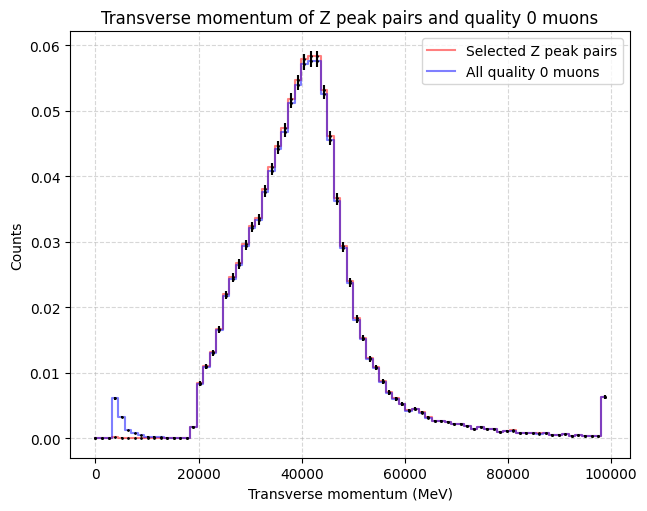

In [9]:
coolplot([Zmumu_pt, pt],np.linspace(0,100000,80),['r','b'],['Selected Z peak pairs','All quality 0 muons'],'Transverse momentum (MeV)',
'Counts','Transverse momentum of Z peak pairs and quality 0 muons')

In [12]:
#Prepare the data for the plots

#Choose the range of events to plot
nmin=0
nmax=1000

Zmumu_pt=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin:nmax]
Zmumu_eta=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin:nmax]
Zmumu_phi=quality_selector(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin:nmax]
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

ZeroBias_eta=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin:nmax]
ZeroBias_phi=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin:nmax]
ZeroBias_pt=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin:nmax]

quality_selector: Only 21.265 % of the data has been selected
quality_selector: Only 21.265 % of the data has been selected
quality_selector: Only 21.265 % of the data has been selected


100%|██████████| 1000/1000 [00:00<00:00, 1660.09it/s]


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


muon_isolation_all_events: Computing muon isolation: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]
muon_isolation_all_events: Computing muon isolation: 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


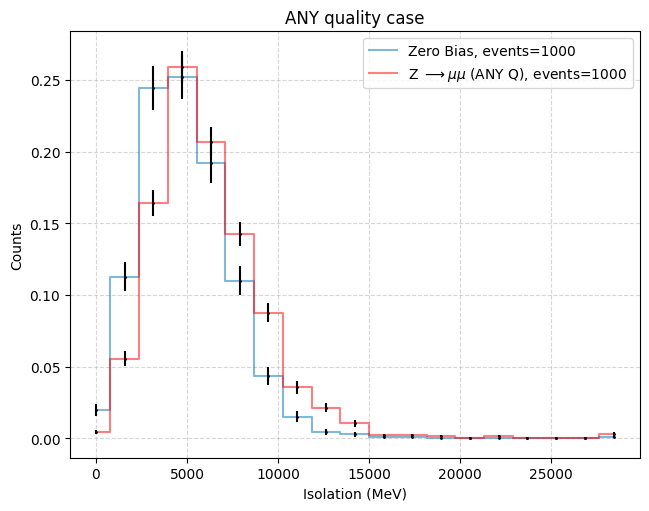

In [13]:

#Check how many events are not empty
non_empty_count1= ak.sum(ak.num(ZeroBias_eta[nmin:nmax]) > 0)
non_empty_count2 = ak.sum(ak.num(Zmumu_eta[nmin:nmax]) > 0)

#Compute the isolation and prepare it for plotting ZeroBias
res=muon_isolation_all_events(MuonTree_ZeroBias,ZeroBias_eta,ZeroBias_phi,0.0,0.4,[nmin,nmax],100)
data1=ak.flatten(res)

#Compute the isolation and prepare it for plotting Z mu mu
res=muon_isolation_all_events(MuonTree_Zmumu,Zmumu_eta,Zmumu_phi,0.0,0.4,[nmin,nmax],100)
data2=ak.flatten(res)

colors=["#0072B2", "#FD0000"]
labels=[fr"Zero Bias, events={non_empty_count1}",fr"Z $\longrightarrow \mu \mu$ (ANY Q), events={non_empty_count2}"]

#Plot the data
coolplot([data1,data2],np.linspace(0,30000,20),colors,labels, "Isolation (MeV)","Counts","ANY quality case")
